In [1]:
import torch

In [2]:
import numpy as np

In [3]:
from torch.utils.data import Dataset, DataLoader

In [4]:
from torchvision.datasets import ImageFolder

Here's what ImageFolder does:

Directory Structure: It assumes a specific directory structure for your dataset. Each subdirectory inside the main directory represents a different class or category of images. For example, if you're building a dataset for classifying different types of animals, you would have subdirectories like cat, dog, bird, etc., each containing images of that respective category.

Data Loading: ImageFolder automatically scans the main directory and its subdirectories, collects the images, and associates them with their corresponding class labels based on the subdirectory they are in.

Label Encoding: It assigns a unique numerical label to each class. These labels are typically integers starting from 0. For example, if you have three classes, cat, dog, and bird, they might be encoded as 0, 1, and 2, respectively.

Data Transformation: You can specify a data transformation function (usually from the torchvision.transforms module) that will be applied to each image as it's loaded. Common transformations include resizing, normalizing pixel values, and data augmentation.

Accessing Data: Once the ImageFolder is created, you can access the images and their labels using indexing. For instance, dataset[0] would give you the first image and its label.

Using ImageFolder simplifies the process of preparing image data for training machine learning models. It's especially useful when you have a dataset organized in a folder structure that aligns with the classes or categories you want to classify.

In [5]:
class PlayingCardDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.data = ImageFolder(data_dir, transform=transform)
    def __len__(self):
        
        return len(self.data)
    
    def __getitem__(self, idx):
        
        #returns the item from the dataset
        #for the provided index - into a tensor
        #it returns (image, class)
        
        return self.data[idx] #gives image and the class from ImageLoader
    @property
    def classes(self):
        
        return self.data.classes
    
    
        

In [6]:
data_dir = r'C:\Users\kingr\Downloads\M2 DSBA\Notebooks\Kaggle\Cards classification\train'
dataset = PlayingCardDataset(data_dir)

In [7]:
len(dataset)

7624

In [8]:
dataset[7623][1]

52

In [9]:
from tqdm.notebook import tqdm
for image, label in tqdm(dataset):
    pass

  0%|          | 0/7624 [00:00<?, ?it/s]

We access the class_to_idx attribute of the ImageFolder instance to get the mapping of class names to their corresponding numerical labels.

In [10]:
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print (target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

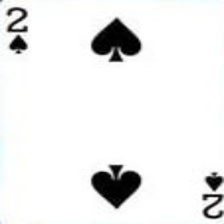

In [11]:
image

In [12]:
target_to_class[label]

'two of spades'

Pytorch model needs these images in the same size. we gotta use transforms from torch vision to resize. 

we can do a lot more things in vision

In [13]:
from torchvision import transforms


In [14]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

dataset = PlayingCardDataset(data_dir, transform= transform)

The __getitem__ method is a special method in Python that is invoked when you use indexing (e.g., my_instance[index]) on an object of your custom class.

In [15]:
dataset[0][0] #is the image transformed to tensor

tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.0784, 0.0824, 0.0745,  ..., 1.0000, 1.0000, 1.0000],
         [0.7490, 0.7451, 0.7412,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.0745, 0.0784, 0.0706,  ..., 1.0000, 1.0000, 1.0000],
         [0.7451, 0.7451, 0.7373,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

In [16]:
dataset[0][0].shape #channels [height x width]

torch.Size([3, 128, 128])

We have 3, 128, 128 --> 128x128 is the pixels. 
3 is the colour channels - R,G,B

In [17]:
torch.ones(3,3,3) # gives 3 sets of 3x3 matrices 

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])

simillarly 3, 128, 128 gives 3 sets of 128x128 pixels, where each set represents their colour value (r,g,b)

Pytorch always needs its data to be tensors to train. So we are creating image tensors, same for audio processing

## Data Loaders

In [18]:
dataloader = DataLoader(dataset, batch_size = 32, shuffle=True) #handle parallelizing the processing of the data

In [19]:
len(dataloader) #creates 239 batches of 32 image each

239

In [20]:
for images, labels in dataloader:
    break

In [21]:
images.shape #[batch_size , channels , height , witdth]

torch.Size([32, 3, 128, 128])

In [22]:
labels.shape

torch.Size([32])

### Model

In [23]:
import timm

In [24]:
base_model = timm.create_model('efficientnet_b0', pretrained = True)

In [25]:
images.shape, labels.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [26]:
import torch
import torch.nn as nn 
import timm 

In PyTorch, when you create a custom neural network model by subclassing nn.Module, you define a forward method within the class. This forward method specifies how the model should process input data and compute its output. When you later instantiate an object of this model class, you can use that object like a function, and it implicitly calls the forward method to perform inference.

we can see passing the image directly to model(images) (without calling the forward method i mean). When we do this: 

The model(images) call implicitly invokes the forward method of the model object.

Inside the forward method, you pass the input image tensor x through the feature extraction layers (self.features) and then through the classifier layers (self.classifier).

In PyTorch, when you call model(images), it knows to perform the forward method and not other methods defined in the class because it's a convention defined by PyTorch itself.

When you create a custom PyTorch model class that inherits from nn.Module, PyTorch expects that you will define a forward method within that class. This forward method is a special method that serves as the entry point for performing forward pass computations, which involve taking input data, passing it through the model's layers, and producing an output.

PyTorch enforces this convention such that when you call model(images), it implicitly invokes the forward method of the model object

In [27]:
class SimpleCardClassifier (nn.Module):
    def __init__(self, num_classes = 53):
        
        super(SimpleCardClassifier, self).__init__()
        
        # The line super(SimpleCardClassifier, self).__init__() in the SimpleCardClassifier  \
        # is used to call the constructor of the parent class (nn.Module), 
        # ensuring that the necessary setup for the nn.Module is performed before you define the specific components of your custom model.
        
        #define layers of the model (it is all about the shape)
        self.base_model = timm.create_model('efficientnet_b0',
                                            pretrained = True)
        #when we say pretrained = true, this efficient net from timms comes with model weights that has been trained on large image dataset.classes
        # we are using pretrained so start with some pretrained weights already (trained on imagenet dataset)
        
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])
        # Output size is 1280
        feature_size = 1280
        self.classifier = nn.Sequential (
            nn.Flatten(),
            nn.Linear(feature_size, num_classes)
            
        )
        
    
    def forward(self, x):
        
        # what connects the layer (example that comes here is the image)
        
        x= self.features(x)
        x = self.classifier(x)
        
        return x #[batch_size, num_classes]
        

EfficientNet-B0 Backbone:

The EfficientNet-B0 architecture is a deep convolutional neural network (CNN) designed for image classification tasks.
It consists of multiple layers of convolutional and pooling operations, which learn to extract hierarchical features from the input images.
EfficientNet models are known for their efficiency and effectiveness in capturing image features.

Role of Feature Extraction:

The feature extraction part takes an input image and processes it through a series of convolutional and pooling layers.
At each layer, the input image is transformed to capture different levels of visual information. Lower layers capture basic features like edges and textures, while higher layers capture more abstract and complex features like shapes and object parts.
By the time the input image passes through all these layers, the network has learned to represent the image in a way that is suitable for classification.

In [28]:
model = SimpleCardClassifier()

# Training model

train the model, by looping the batches by dataloader, sending it to the model using forward method, computing the loss, performing backprop

In [29]:
train_dir = r'C:\Users\kingr\Downloads\M2 DSBA\Notebooks\Kaggle\Cards classification\train'
test_dir = r'C:\Users\kingr\Downloads\M2 DSBA\Notebooks\Kaggle\Cards classification\test'
valid_dir = r'C:\Users\kingr\Downloads\M2 DSBA\Notebooks\Kaggle\Cards classification\valid'


In [30]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

#Creating datasets
train_dataset = PlayingCardDataset(train_dir, transform=transform)
valid_dataset = PlayingCardDataset(valid_dir, transform=transform)
test_dataset = PlayingCardDataset(test_dir, transform=transform)

#Creating dataloaders for torch
train_loader = DataLoader(train_dataset, batch_size=32, shuffle= True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle= True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle= True)

Define loss criteria and optimizer

In [31]:
import torch.optim as optim

#loss

criterion = nn.CrossEntropyLoss() 

#optimizer

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [32]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


This is the basic training loop structure in Pytorch

In [33]:
#Training Loop

num_epochs = 5
train_losses = []
val_losses = []

model = SimpleCardClassifier()

model.to(device)

#loss

criterion = nn.CrossEntropyLoss() 

#optimizer

optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    
    #Validation phase
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            #no loss backward this time, cuz we are validating, so we dont update weights
            
            running_loss += loss.item() * images.size(0)
    val_loss = running_loss / len(valid_loader.dataset)
    val_losses.append(val_loss)
    
    print(f'Epoch {epoch+1} / {num_epochs} - Train Loss: {train_loss} - Val loss: {val_loss}')


  0%|          | 0/239 [00:00<?, ?it/s]

Epoch 1 / 5 - Train Loss: 1.5109067045754176 - Val loss: 0.09937333475868657


  0%|          | 0/239 [00:00<?, ?it/s]

Epoch 2 / 5 - Train Loss: 0.5263846991945289 - Val loss: 0.09506736161573878


  0%|          | 0/239 [00:00<?, ?it/s]

Epoch 3 / 5 - Train Loss: 0.3218232043329841 - Val loss: 0.05344159243241796


  0%|          | 0/239 [00:00<?, ?it/s]

Epoch 4 / 5 - Train Loss: 0.24070641023164532 - Val loss: 0.055768545618597065


  0%|          | 0/239 [00:00<?, ?it/s]

Epoch 5 / 5 - Train Loss: 0.20091343313408674 - Val loss: 0.04461420628874791


In [34]:
#### Testing it out

In [34]:
train_losses

[1.5109067045754176,
 0.5263846991945289,
 0.3218232043329841,
 0.24070641023164532,
 0.20091343313408674]

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Put the model in evaluation mode
model.eval()

# Initialize lists to store true labels and predictions
true_labels = []
predictions = []

# Disable gradient calculations
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.cpu().numpy())
        predictions.extend(predicted.cpu().numpy())

# Compute metrics
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


Accuracy: 0.9660377358490566
Precision: 0.9725965858041328
Recall: 0.9660377358490566


In the context of image processing, the unsqueeze method is often used to convert a single image (3D tensor with shape [C, H, W], where C is the number of channels, H is the height, and W is the width) into a batch of images (4D tensor with shape [N, C, H, W], where N is the batch size) by adding a batch dimension at index 0. This is commonly done to ensure that the model can process images in batches even when you want to process a single image.

The unsqueeze method takes one argument, which is the index of the axis along which you want to insert the new dimension. Here's how it works:

If you call unsqueeze(dim), it inserts a new dimension of size 1 at the specified dimension dim.

So unsqueeze(0) adds a new dimension for batch size, because our model takes tensors of that size [Batch_size, Channels, Height, Width]


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

#Load and preprocess the image

def preprocess_image(image_path, transform):
    
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

def predict(model, image_tensor, device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()

#Viz

def visualize_predictions(original_image, probabilities, class_names):
    
    # Display image using PIL
    original_image.show()
    
    # Create a horizontal bar plot using seaborn
    plt.figure(figsize=(8, 4))
    sns.barplot(x=probabilities, y=class_names, orient="h")
    plt.xlabel('Probability')
    plt.title("Class Predictions")
    plt.xlim(0, 1)
    plt.show()


with torch.no_grad(): This is a context manager provided by PyTorch. Within this context, PyTorch disables gradient computation for memory optimization. During inference, you typically don't need to compute gradients, so this context manager prevents unnecessary memory usage for gradient storage.

probabilities = torch.nn.functional.softmax(outputs, dim=1): This line applies the softmax function along the specified dimension (dim=1) to the model's output tensor. The softmax function converts the class scores into class probabilities, ensuring that they sum to 1. This step produces a tensor of class probabilities.

dim = 1 because output tensor shape is [batch_size, num_classes]

we need to apply softmax on num_classes to turn them into probabilities. that's why dim=1

four of diamonds


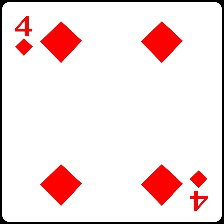

In [50]:
test_image = r'C:\Users\kingr\Downloads\M2 DSBA\Notebooks\Kaggle\Cards classification\test\four of diamonds\1.jpg'

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

orginal_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

class_names = dataset.classes
label = np.argmax(probabilities)
print(target_to_class[label])
Image.open(test_image)
#visualize_predictions(orginal_image, probabilities, class_names)

king of spades


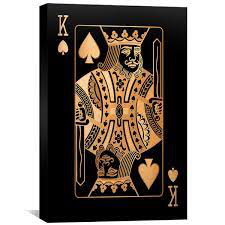

In [51]:
test_image = r'C:\Users\kingr\Downloads\M2 DSBA\Notebooks\Kaggle\Cards classification\kofspades.jpeg'

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

orginal_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

class_names = dataset.classes
#visualize_predictions(orginal_image, probabilities, class_names)

label = np.argmax(probabilities)
print(target_to_class[label])
Image.open(test_image)

king of spades


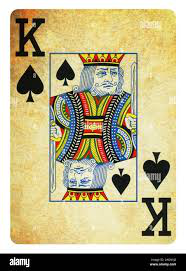

In [52]:
test_image = r'C:\Users\kingr\Downloads\M2 DSBA\Notebooks\Kaggle\Cards classification\kofspades2.jpeg'

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

orginal_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

class_names = dataset.classes
#visualize_predictions(orginal_image, probabilities, class_names)

label = np.argmax(probabilities)
print(target_to_class[label])
Image.open(test_image)

ace of spades


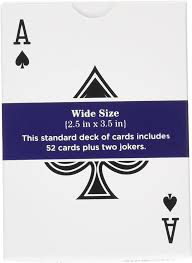

In [53]:
test_image = r'C:\Users\kingr\Downloads\M2 DSBA\Notebooks\Kaggle\Cards classification\acespade.jpeg'

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

orginal_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

class_names = dataset.classes
#visualize_predictions(orginal_image, probabilities, class_names)

label = np.argmax(probabilities)
print(target_to_class[label])
Image.open(test_image)

seven of clubs


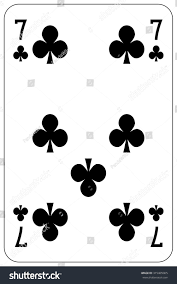

In [54]:
test_image = r'C:\Users\kingr\Downloads\M2 DSBA\Notebooks\Kaggle\Cards classification\7clubs.png'

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

orginal_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

class_names = dataset.classes
#visualize_predictions(orginal_image, probabilities, class_names)

label = np.argmax(probabilities)
print(target_to_class[label])
Image.open(test_image)